In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load withinFile_df, withinRepo_df and acrossRepo_df from pickle files (../parsers/parsed/)
withinFile_df = pd.read_pickle("../../parsers/parsed/withinFile.pkl")
withinRepo_df = pd.read_pickle("../../parsers/parsed/withinRepo.pkl")
acrossRepo_df = pd.read_pickle("../../parsers/parsed/acrossRepos_df.pkl")

In [3]:
# get number of followers 
userFollowers_df = pd.read_csv("../../GHData_users_meta/userFollowersData.csv")
userFork_df = pd.read_csv("../../GHData_users_meta/userForkedReposData.csv")
userRepo_df = pd.read_csv("../../GHData_users_meta/userRepoData.csv")
userStar_df = pd.read_csv("../../GHData_users_meta/userTotalStarsReceived.csv")
userPR_df = pd.read_csv("../../GHData_users_meta/userPRData.csv")

In [4]:
def applyFollowerBins(df):
    # new column which uses 'followers' column to bin the data into: 0-5, 6-25, 25-100, 100-999, 1000+
    df['followers_bins'] = pd.cut(df['followers'], bins=[-1, 5, 25, 100, df['followers'].max()], labels=['0-5', '6-25', '26-100', '100+'])
    return df

def applyForkBins(df):
    df['forks_bins'] = pd.cut(df['forkedRepos'], bins=[-1, 5, 25, df['forkedRepos'].max()], labels=['0-5', '6-25', '25+'])
    return df

def applyStarBins(df):
    df['stars_bins'] = pd.cut(df['totalStarsReceived'], bins=[-1, 5, 25, df['totalStarsReceived'].max()], labels=['0-5', '6-25', '25+'])
    return df

def applyPRBins(df):
    df['userPRs_bins'] = pd.cut(df['userPRs'], bins=[-1, 5, 25, 100, df['userPRs'].max()], labels=['0-5', '6-25', '26-100',  '100+'])
    return df

def applyAllBins(df):
    df = applyFollowerBins(df)
    df = applyForkBins(df)
    df = applyStarBins(df)
    df = applyPRBins(df)
    return df

userMeta_df = userFollowers_df.merge(userFork_df, on='username').merge(userStar_df, on='username').merge(userPR_df, on='username')

In [5]:
def load_data(file_paths, user_meta_paths):
    data_frames = {}
    for key, path in file_paths.items():
        data_frames[key] = pd.read_pickle(path)
    
    user_meta = {}
    for key, path in user_meta_paths.items():
        user_meta[key] = pd.read_csv(path)
    
    return data_frames, user_meta

In [6]:
userMeta_df

,username,followers,forkedRepos,totalStarsReceived,userPRs
0,dragen1860,2995.0,14,26649,1
1,hphp777,0.0,0,4,0
2,harimaruthachalam,10.0,9,0,1
3,G-U-N,147.0,25,1529,5
4,Ninzore,58.0,17,2788,13
...,...,...,...,...,...
1805,Nial4,4.0,11,2,8
1806,yingmuying,4.0,368,2,0
1807,patugosavi,1.0,0,12,0
1808,gathierry,23.0,8,358,2


In [7]:
file_paths = {
    'withinFile': "../../parsers/parsed/withinFile.pkl",
    'withinRepo': "../../parsers/parsed/withinRepo.pkl",
    'acrossRepo': "../../parsers/parsed/acrossRepos_df.pkl",
}

user_meta_paths = {
    'followers': "../../GHData_users_meta/userFollowersData.csv",
    'forks': "../../GHData_users_meta/userForkedReposData.csv",
    'stars': "../../GHData_users_meta/userTotalStarsReceived.csv",
    'prs': "../../GHData_users_meta/userPRData.csv",
}

data_frames, user_meta = load_data(file_paths, user_meta_paths)

def makeSimilarityTypes(df, threshold):
    df['similarityType'] = np.where(df["similarity"] > threshold, "Type 1/2", "Type 3")
    return df

data_frames = {
    'acrossRepo': makeSimilarityTypes(data_frames['acrossRepo'], 95),
    'withinRepo': makeSimilarityTypes(data_frames['withinRepo'], 95),
    'withinFile': makeSimilarityTypes(data_frames['withinFile'], 95)
}


In [8]:
data_frames['acrossRepo'].rename(columns={'acrossRepoPairsCount': 'clonePairCount'}, inplace=True)
acrossRepo_df = data_frames['acrossRepo']
acrossRepo_sameUser_df = acrossRepo_df[acrossRepo_df['sameUser'] == True]
data_frames['acrossRepo_same_user'] = acrossRepo_sameUser_df
data_frames['acrossRepo_same_user']

,bucketId,similarity,repoObjects,acrossRepoPairs,sameUser,clonePairCount,similarityType
5,6,98,"[{'repoName': 'ssdetection', 'userName': 'Dete...","[({'repoName': 'ssdetection', 'userName': 'Det...",True,1,Type 1/2
6,7,80,"[{'repoName': 'ssdetection', 'userName': 'Dete...","[({'repoName': 'ssdetection', 'userName': 'Det...",True,4,Type 3
7,8,100,"[{'repoName': 'ssdetection', 'userName': 'Dete...","[({'repoName': 'ssdetection', 'userName': 'Det...",True,1,Type 1/2
8,9,100,"[{'repoName': 'ssdetection', 'userName': 'Dete...","[({'repoName': 'ssdetection', 'userName': 'Det...",True,1,Type 1/2
31,32,70,"[{'repoName': 'GoogLeNet-PyTorch', 'userName':...","[({'repoName': 'GoogLeNet-PyTorch', 'userName'...",True,528,Type 3
...,...,...,...,...,...,...,...
2959,2960,98,"[{'repoName': 'LTE-PyTorch', 'userName': 'Lorn...","[({'repoName': 'LTE-PyTorch', 'userName': 'Lor...",True,1,Type 1/2
2960,2961,100,"[{'repoName': 'LTE-PyTorch', 'userName': 'Lorn...","[({'repoName': 'LTE-PyTorch', 'userName': 'Lor...",True,1,Type 1/2
2963,2964,100,"[{'repoName': 'Pix2Pix-In-PyTorch', 'userName'...","[({'repoName': 'Pix2Pix-In-PyTorch', 'userName...",True,1,Type 1/2
2979,2980,72,"[{'repoName': 'BEGAN-PyTorch', 'userName': 'Hi...","[({'repoName': 'BEGAN-PyTorch', 'userName': 'H...",True,4,Type 3


In [9]:
acrossRepo_SameUsers_df = data_frames['acrossRepo_same_user'].explode(['repoObjects']).rename(columns = {'repoObjects':'repoObject'})
acrossRepo_SameUsers_df['username'] = acrossRepo_SameUsers_df['repoObject'].apply(lambda x: x.get('userName'))
acrossRepo_SameUsers_df = acrossRepo_SameUsers_df.merge(userMeta_df, left_on='username', right_on='username')
acrossRepo_SameUsers_df = acrossRepo_SameUsers_df.groupby(['bucketId', 'similarityType']).agg({'clonePairCount': 'mean', 'followers': 'mean', 'forkedRepos': 'mean', 'totalStarsReceived' : 'mean', 'userPRs': 'mean'}).reset_index()
acrossRepo_SameUsers_df.rename(columns = {'acrossRepoPairsCount': 'clonePairCount'}, inplace = True)
acrossRepo_SameUsers_df = applyAllBins(acrossRepo_SameUsers_df)


withinRepo_Users_df = data_frames['withinRepo'].groupby(['userName', 'similarityType']).agg({'clonePairCount': 'sum'}).reset_index()
withinRepo_Users_df = withinRepo_Users_df.merge(userMeta_df, left_on='userName', right_on='username').drop(columns=['username'])
withinRepo_Users_df = applyAllBins(withinRepo_Users_df)

withinFile_Users_df = data_frames['withinFile'].groupby(['userName', 'similarityType']).agg({'clonePairCount': 'sum'}).reset_index()
withinFile_Users_df = withinFile_Users_df.merge(userMeta_df, left_on='userName', right_on='username').drop(columns=['username'])
withinFile_Users_df = applyAllBins(withinFile_Users_df)

data_frames = {
    'acrossRepo': acrossRepo_SameUsers_df,
    'withinRepo': withinRepo_Users_df,
    'withinFile': withinFile_Users_df
}

In [10]:
data_frames['acrossRepo'].groupby(['followers_bins', 'similarityType'])["clonePairCount"].describe()

/tmp/ipykernel_104939/2495285723.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_frames['acrossRepo'].groupby(['followers_bins', 'similarityType'])["clonePairCount"].describe()


count       mean         std  min   25%  50%  \
followers_bins similarityType                                                 
0-5            Type 1/2         26.0   1.461538    0.904689  1.0  1.00  1.0   
               Type 3           28.0  10.428571   12.404983  1.0  2.75  5.5   
6-25           Type 1/2         73.0   1.821918    1.981459  1.0  1.00  1.0   
               Type 3           29.0   3.103448    3.498416  1.0  1.00  1.0   
26-100         Type 1/2         90.0   1.988889    3.846769  1.0  1.00  1.0   
               Type 3           44.0   3.977273    7.147901  1.0  1.00  1.0   
100+           Type 1/2         46.0   1.413043    0.979253  1.0  1.00  1.0   
               Type 3           67.0  49.955224  127.976493  1.0  1.00  1.0   

                                75%    max  
followers_bins similarityType               
0-5            Type 1/2         1.0    4.0  
               Type 3          12.0   48.0  
6-25           Type 1/2         1.0   10.0  
               Type 3           3.0   12.0  
26-100         Type 1/2         1.0   28.0  
               Type 3           4.0   45.0  
100+           Type 1/2         1.0    6.0  
               Type 3          15.0  698.0

In [11]:
def calculate_clone_percentage(df, metric, similarity_type_col='similarityType', clone_pair_count_col='clonePairCount'):
    """
    Calculates the percentage of clone pairs for each nlines bin and similarity type.

    Parameters:
    - df: DataFrame containing the clone data.
    - metric: Column name for metric to group by (e.g., 'followers_bins').
    - similarity_type_col: Column name for the similarity type.
    - clone_pair_count_col: Column name for the count of clone pairs.

    Returns:
    - A DataFrame with the original columns plus a 'percentage' column representing
      the percentage of clone pairs for each nlines bin and similarity type.
    """

    # Group by metric and similarityType, then sum up clonePairCount
    grouped_df = df.groupby([metric, similarity_type_col]).agg({clone_pair_count_col: 'median'}).reset_index()

    # Calculate the total clone counts per nlines bin
    total_clones_per_bin = df.groupby(metric)[clone_pair_count_col].sum().reset_index(name='totalCloneCount')

    # Merge to calculate percentages
    merged_df = pd.merge(grouped_df, total_clones_per_bin, on=metric)
    merged_df['percentage'] = (merged_df[clone_pair_count_col] / merged_df['totalCloneCount']) * 100

    # Select and return the desired columns
    result_df = merged_df[[metric, similarity_type_col, clone_pair_count_col, 'percentage']]
    result_df.sort_values(by=[similarity_type_col], inplace=True)
    return result_df


In [12]:
# def visualize_metrics(data_frames, user_metric, title_prefix=''):
#     data_frames = {
#         key: calculate_clone_percentage(df, user_metric + "_bins") for key, df in data_frames.items()
#     }  
    
#     fig, axes = plt.subplots(1, 3, figsize=(18, 6))
#     for ax, (key, df) in zip(axes.flat, data_frames.items()):
#         sns.boxplot(x=user_metric + '_bins', y='clonePairCount', hue="similarityType", data=df, ax=ax, showfliers=False)
#         ax.set_title(f'{title_prefix} {key}')
#         ax.set_xlabel(f'{user_metric.capitalize()} Bins')
#         ax.set_ylabel('Clone Pair Count')
#         for p, (index, row) in zip(ax.patches, df.iterrows()):
#             # annotate the median value
#             ax.annotate(f"{row['clonePairCount']:.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#     plt.tight_layout()
#     plt.show()



# def visualize_metrics(data_frames, user_metric, title_prefix=''):
#     data_frames = {
#         key: df.groupby([user_metric + "_bins", 'similarityType'])["clonePairCount"] for key, df in data_frames.items()
#     }  

#     fig, axes = plt.subplots(1, 3, figsize=(18, 6))
#     for ax, (key, df) in zip(axes.flat, data_frames.items()):
#         # Create the boxplot
#         bp = sns.boxplot(x=user_metric + '_bins', y='clonePairCount', hue="similarityType", data=data_frames, ax=ax)
#         ax.set_title(f'{title_prefix} {key}')
#         ax.set_xlabel(f'{user_metric.capitalize()} Bins')
#         ax.set_ylabel('Clone Pair Count')
        

#     plt.tight_layout()
#     plt.show()



def visualize_metrics(data_frames, user_metric, title_prefix=''):
    # Assuming calculate_clone_percentage or some other method is used for binning data appropriately.
    # The data_frames dictionary should contain DataFrames properly structured with user_metric + "_bins" and "similarityType"

    fig, axes = plt.subplots(1, len(data_frames), figsize=(18, 6))  # Adjust the number of subplots based on the length of data_frames
    for ax, (key, df) in zip(axes.flat, data_frames.items()):
        colors = {'Type 1/2': '#3274A1', 'Type 3': '#E1812C'}
        sns.boxplot(x=user_metric + '_bins', y='clonePairCount', hue='similarityType', data=df, ax=ax, showfliers=False, palette=colors)
        ax.set_title(f'{title_prefix} {key}')
        ax.set_xlabel(f'{user_metric.capitalize()} Bins')
        ax.set_ylabel('Clone Pair Count')

    plt.tight_layout()
    plt.show()

/home/abeeto/miniconda3/envs/ldaTopicModel/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/abeeto/miniconda3/envs/ldaTopicModel/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/abeeto/miniconda3/envs/ldaTopicModel/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

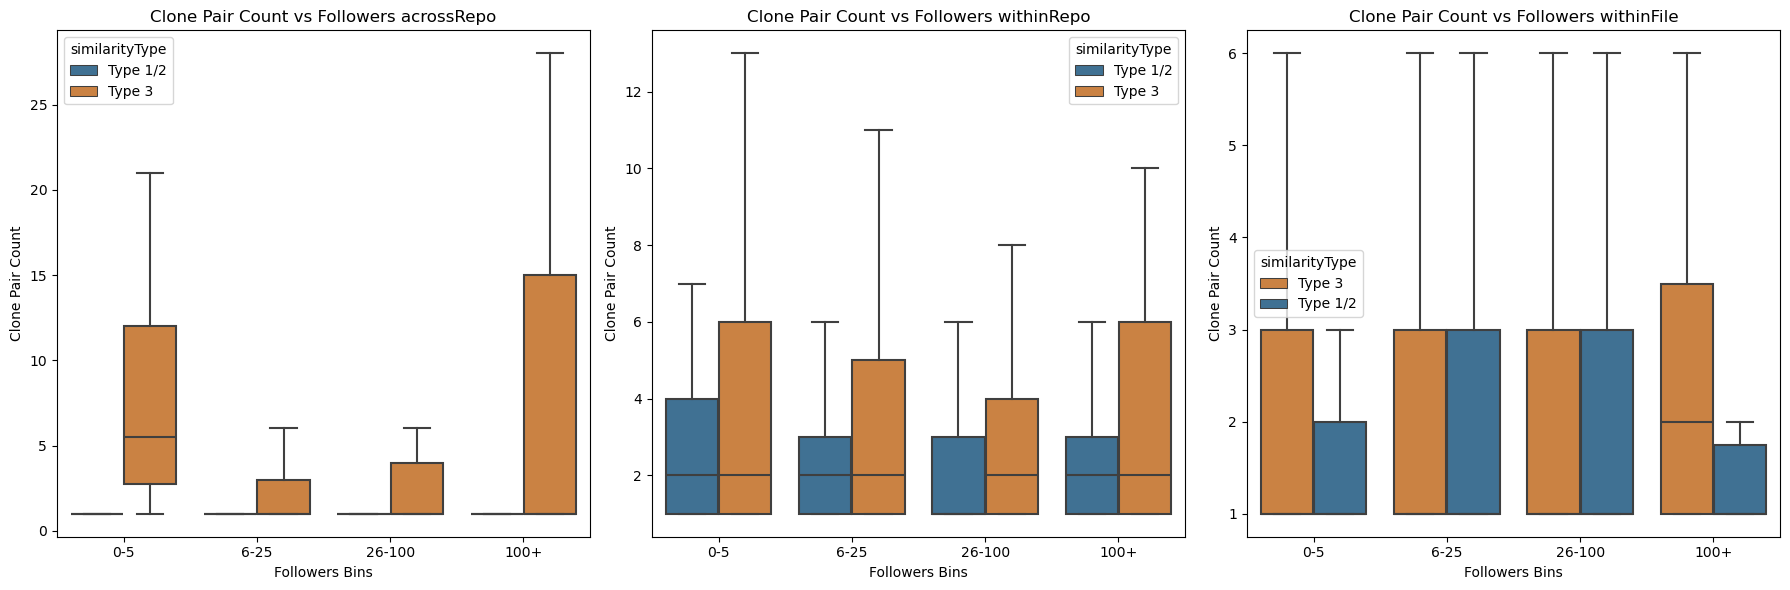

/home/abeeto/miniconda3/envs/ldaTopicModel/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/abeeto/miniconda3/envs/ldaTopicModel/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/abeeto/miniconda3/envs/ldaTopicModel/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

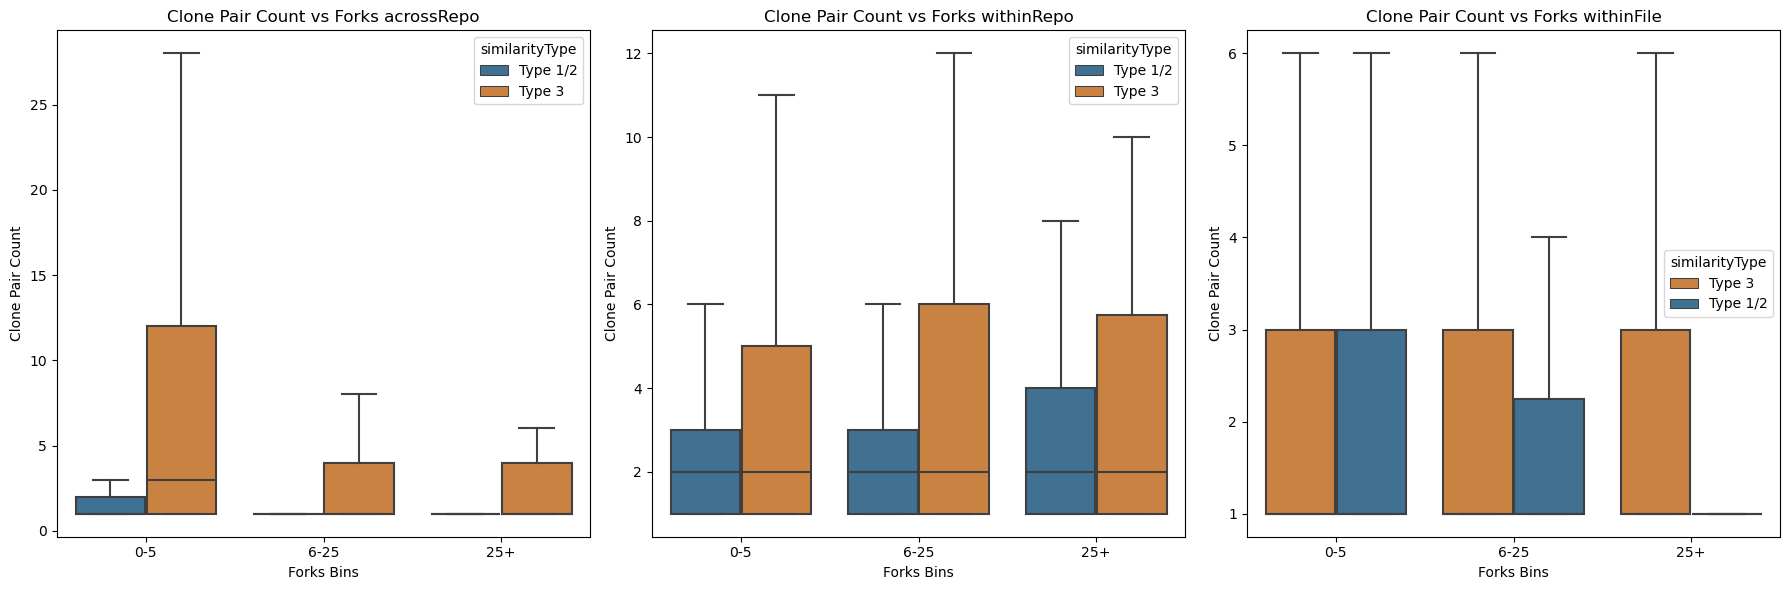

/home/abeeto/miniconda3/envs/ldaTopicModel/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/abeeto/miniconda3/envs/ldaTopicModel/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/abeeto/miniconda3/envs/ldaTopicModel/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

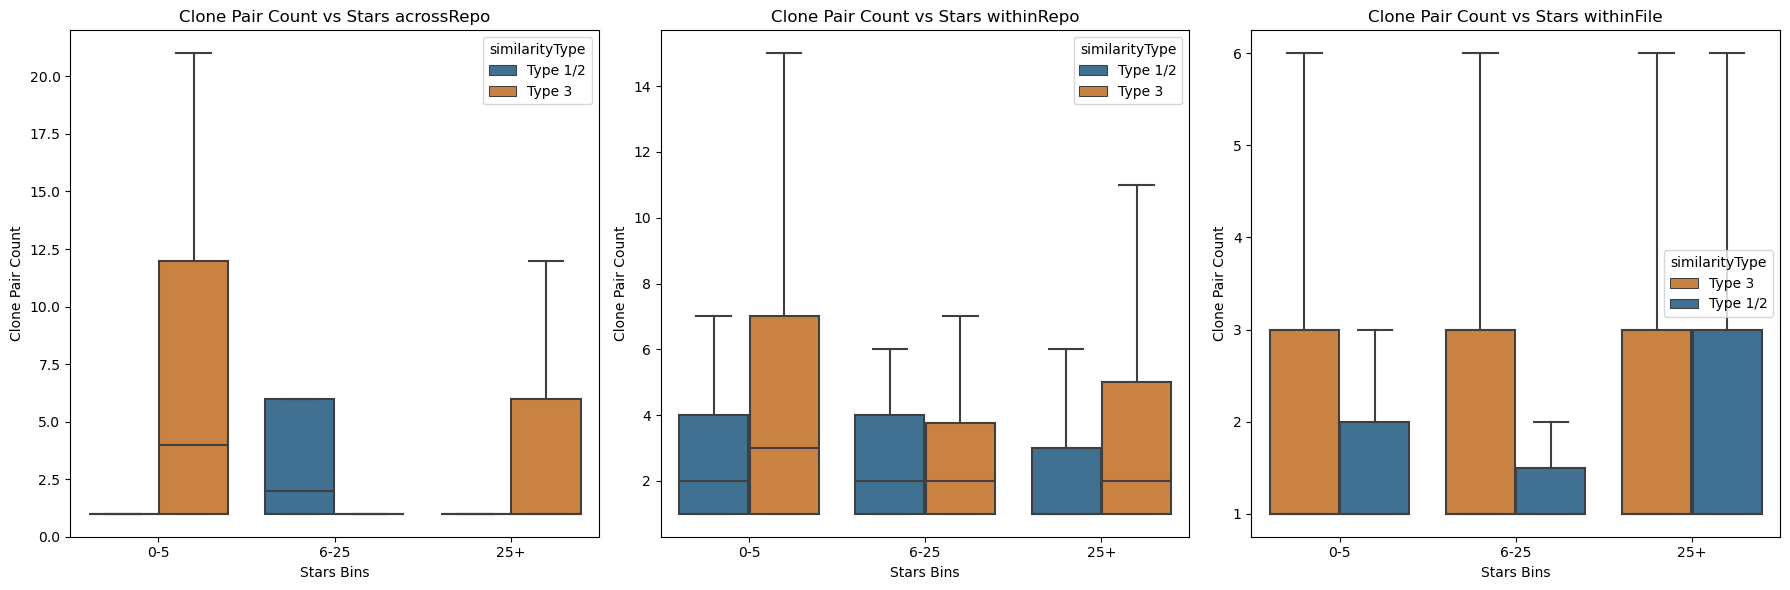

/home/abeeto/miniconda3/envs/ldaTopicModel/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/abeeto/miniconda3/envs/ldaTopicModel/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/abeeto/miniconda3/envs/ldaTopicModel/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

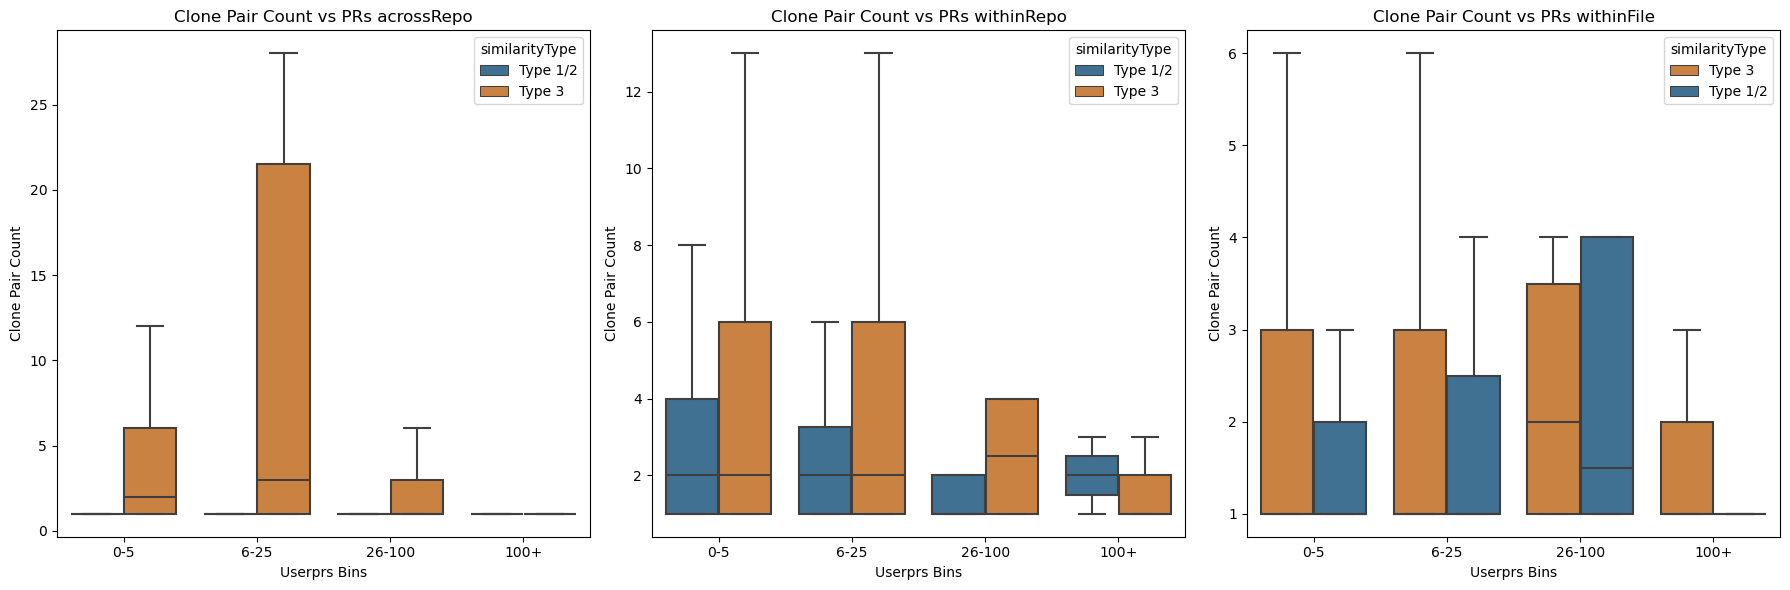

In [13]:
visualize_metrics(data_frames, 'followers', 'Clone Pair Count vs Followers')
visualize_metrics(data_frames, 'forks', 'Clone Pair Count vs Forks')
visualize_metrics(data_frames, 'stars', 'Clone Pair Count vs Stars')
visualize_metrics(data_frames, 'userPRs', 'Clone Pair Count vs PRs')

In [23]:

# merge all dataframes into one
all_df = pd.concat([data_frames['acrossRepo'], data_frames['withinRepo'], data_frames['withinFile']])
all_df

# describe all data
# all_df.groupby(['followers_bins', 'similarityType'])["clonePairCount"].describe()
# all_df.groupby(['forks_bins', 'similarityType'])["clonePairCount"].describe()
# all_df.groupby(['stars_bins', 'similarityType'])["clonePairCount"].describe()
all_df.groupby(['userPRs_bins', 'similarityType'])["clonePairCount"].describe()

/tmp/ipykernel_104939/3810799956.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_df.groupby(['userPRs_bins', 'similarityType'])["clonePairCount"].describe()


count       mean        std  min  25%  50%   75%  \
userPRs_bins similarityType                                                     
0-5          Type 1/2        453.0   3.624724   9.624614  1.0  1.0  1.0  3.00   
             Type 3          896.0   4.944196  12.217270  1.0  1.0  2.0  4.00   
6-25         Type 1/2         83.0   2.879518   6.494646  1.0  1.0  1.0  2.50   
             Type 3          176.0  23.704545  84.189264  1.0  1.0  1.0  6.00   
26-100       Type 1/2         32.0   2.062500   2.154328  1.0  1.0  1.0  2.00   
             Type 3           61.0   6.295082  17.953964  1.0  1.0  2.0  4.00   
100+         Type 1/2         53.0   1.075472   0.331027  1.0  1.0  1.0  1.00   
             Type 3           30.0   1.866667   2.224214  1.0  1.0  1.0  1.75   

                               max  
userPRs_bins similarityType         
0-5          Type 1/2        117.0  
             Type 3          184.0  
6-25         Type 1/2         45.0  
             Type 3          698.0  
26-100       Type 1/2         10.0  
             Type 3          134.0  
100+         Type 1/2          3.0  
             Type 3           12.0

In [15]:
data_frames['acrossRepo']

,bucketId,similarityType,clonePairCount,followers,forkedRepos,totalStarsReceived,userPRs,followers_bins,forks_bins,stars_bins,userPRs_bins
0,6,Type 1/2,1.0,0.0,0.0,0.0,0.0,0-5,0-5,0-5,0-5
1,7,Type 3,4.0,0.0,0.0,0.0,0.0,0-5,0-5,0-5,0-5
2,8,Type 1/2,1.0,0.0,0.0,0.0,0.0,0-5,0-5,0-5,0-5
3,9,Type 1/2,1.0,0.0,0.0,0.0,0.0,0-5,0-5,0-5,0-5
4,32,Type 3,528.0,265.0,1.0,1910.0,10.0,100+,0-5,25+,6-25
...,...,...,...,...,...,...,...,...,...,...,...
399,2960,Type 1/2,1.0,265.0,1.0,1910.0,10.0,100+,0-5,25+,6-25
400,2961,Type 1/2,1.0,265.0,1.0,1910.0,10.0,100+,0-5,25+,6-25
401,2964,Type 1/2,1.0,23.0,5.0,14.0,5.0,6-25,0-5,6-25,0-5
402,2980,Type 3,4.0,41.0,17.0,125.0,16.0,26-100,6-25,25+,6-25


In [16]:
acrossRepo_SameUsers_df

,bucketId,similarityType,clonePairCount,followers,forkedRepos,totalStarsReceived,userPRs,followers_bins,forks_bins,stars_bins,userPRs_bins
0,6,Type 1/2,1.0,0.0,0.0,0.0,0.0,0-5,0-5,0-5,0-5
1,7,Type 3,4.0,0.0,0.0,0.0,0.0,0-5,0-5,0-5,0-5
2,8,Type 1/2,1.0,0.0,0.0,0.0,0.0,0-5,0-5,0-5,0-5
3,9,Type 1/2,1.0,0.0,0.0,0.0,0.0,0-5,0-5,0-5,0-5
4,32,Type 3,528.0,265.0,1.0,1910.0,10.0,100+,0-5,25+,6-25
...,...,...,...,...,...,...,...,...,...,...,...
399,2960,Type 1/2,1.0,265.0,1.0,1910.0,10.0,100+,0-5,25+,6-25
400,2961,Type 1/2,1.0,265.0,1.0,1910.0,10.0,100+,0-5,25+,6-25
401,2964,Type 1/2,1.0,23.0,5.0,14.0,5.0,6-25,0-5,6-25,0-5
402,2980,Type 3,4.0,41.0,17.0,125.0,16.0,26-100,6-25,25+,6-25


In [17]:
userFollowers_df = applyFollowerBins(userFollowers_df)
userFollowerCount = userFollowers_df.groupby('followers_bins').size().reset_index(name='count')
userFollowerCount

/tmp/ipykernel_104939/2984719100.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  userFollowerCount = userFollowers_df.groupby('followers_bins').size().reset_index(name='count')


,followers_bins,count
0,0-5,846
1,6-25,491
2,26-100,285
3,100+,156


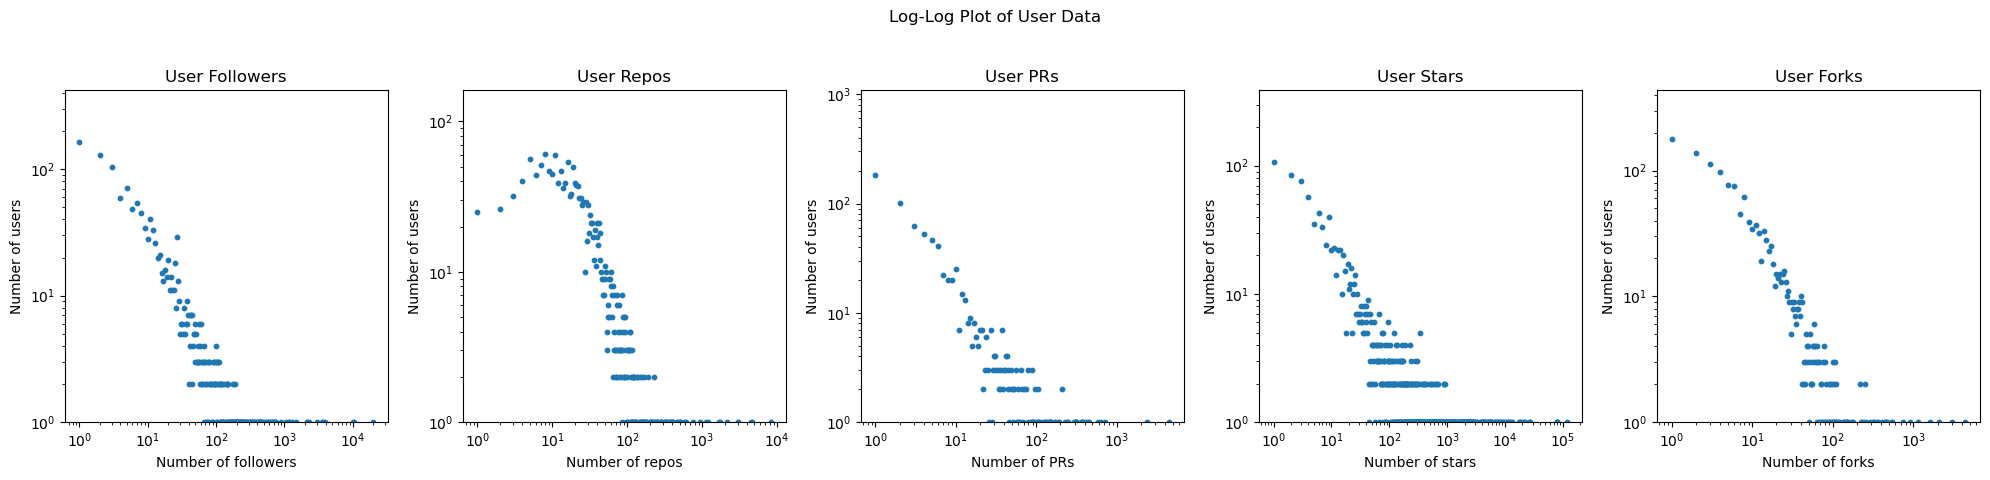

In [18]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Log-Log Plot of User Data")
columns = ['followers', 'repos', 'userPRs', 'totalStarsReceived', 'forkedRepos']
dataframes = [userFollowers_df, userRepo_df, userPR_df, userStar_df, userFork_df]
titles = ['User Followers', 'User Repos', 'User PRs', 'User Stars', 'User Forks']
xlabels = ['Number of followers',  'Number of repos', 'Number of PRs', 'Number of stars', 'Number of forks']

for i, (column, dataframe, title, xlabel) in enumerate(zip(columns, dataframes, titles, xlabels)):
    counts = dataframe[column].value_counts()
    ax[i].scatter(counts.index, counts.values, s=10)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_ylim(1, max(counts.values)+100)  # setting lower limit to 1 to avoid log(0) error
    ax[i].set_title(title)
    ax[i].set_xlabel(xlabel)
    ax[i].set_ylabel("Number of users")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the subplots to provide space for the suptitle
plt.show()
